## Analysing the Impact of Culture & Socio Demographics on the Spread of Covid

In [32]:
# importing required libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Graphical libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sklearn modules
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

pd.set_option('display.max_columns', None)

#pd.set_option('display.max_rows', None)

Loading Data

In [33]:
covid_data = pd.read_excel('4analysis_covidcases.xlsx')

In [34]:
covid_data.head()
# Data has been cleaned and tables have been combined in Excel 


,country,%_electricity,GDP,GDP_growth,GDP_per_capita,%_population_65+,population,population_growth,population_density,population_65+,%_urban_population,urban_population,area,%_health_expenditure,%_gov_health_expenditure,life_expectancy,infant_mortality,Lat,Long,cult_pdi,cult_idv,cult_mas,cult_uai,cult_ltowvs,cult_ivr,sum_covid_cases_194weeks,Covid_Cases_per_1000pp
0,Argentina,100.000000,5.176267e+11,-2.565352,11633.498009,11.117789,44494502,1.015808,16.258510,4946805,91.870,40877099,2780400.0,9.624540,5.910171,76.52000,8.7,-384161.0,-636167.0,49,46,56,86,20,62,20261654,455.374329
1,Australia,100.000000,1.432881e+12,2.949286,57354.964046,15.656475,24982688,1.536106,3.247871,3911408,86.012,21488110,7741220.0,9.284598,6.412437,82.74878,3.1,27.0,133.0,38,90,61,51,21,71,1140860,45.666023
2,Austria,100.000000,4.550949e+11,2.580121,51478.285262,19.001566,8840521,0.487072,107.131900,1679837,58.297,5153759,83879.0,10.325600,7.546474,81.69268,2.9,475162.0,145501.0,11,55,79,70,60,63,2996368,338.935680
3,Bangladesh,85.160423,2.740391e+11,7.863743,1698.350394,5.158391,161356039,1.050045,1239.579000,8323375,36.632,59107944,147630.0,2.342806,0.397788,72.32000,26.7,23685.0,903563.0,80,20,55,60,47,20,23873407,147.954840
4,Belgium,100.000000,5.437344e+11,1.812296,47583.074941,18.788744,11427054,0.455185,377.379600,2147000,98.001,11198627,30530.0,10.318650,7.819944,81.59512,2.8,508333.0,4469936.0,65,75,54,94,82,57,7652042,669.642587


## The Target Variable is the no. of registered covid cases per 100k per country, 193 weeks after the first case has been reported



## Exploring Data

In [35]:
covid_data.shape

(75, 27)

In [36]:
covid_data.describe

<bound method NDFrame.describe of          country  %_electricity           GDP  GDP_growth  GDP_per_capita  \
0      Argentina     100.000000  5.176267e+11   -2.565352    11633.498009   
1      Australia     100.000000  1.432881e+12    2.949286    57354.964046   
2        Austria     100.000000  4.550949e+11    2.580121    51478.285262   
3     Bangladesh      85.160423  2.740391e+11    7.863743     1698.350394   
4        Belgium     100.000000  5.437344e+11    1.812296    47583.074941   
..           ...            ...           ...         ...             ...   
70          Iraq      99.900000  2.242280e+11   -0.563615     5834.166211   
71        Kuwait     100.000000  1.406454e+11    1.246274    33994.381917   
72       Lebanon     100.000000  5.496128e+10   -1.926405     8024.803271   
73         Libya      67.000000  5.260789e+10   15.132800     7877.122251   
74  Saudi Arabia     100.000000  7.865218e+11    2.434111    23338.963458   

    %_population_65+  population  populat

In [37]:
covid_data.dtypes

country                      object
%_electricity               float64
GDP                         float64
GDP_growth                  float64
GDP_per_capita              float64
%_population_65+            float64
population                    int64
population_growth           float64
population_density          float64
population_65+                int64
%_urban_population          float64
urban_population              int64
area                        float64
%_health_expenditure        float64
%_gov_health_expenditure    float64
life_expectancy             float64
infant_mortality            float64
Lat                         float64
Long                        float64
cult_pdi                      int64
cult_idv                      int64
cult_mas                      int64
cult_uai                      int64
cult_ltowvs                   int64
cult_ivr                      int64
sum_covid_cases_194weeks      int64
Covid_Cases_per_1000pp      float64
dtype: object

In [38]:
covid_data.isna().sum()
covid_data=covid_data.dropna() 

In [39]:
covid_data.shape

(75, 27)

<AxesSubplot:xlabel='GDP'>

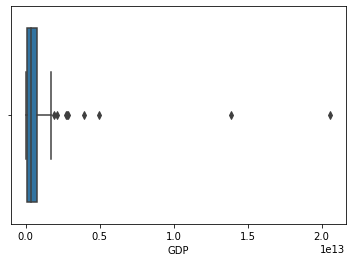

In [40]:
# Checking for ouliers
sns.boxplot(x=covid_data['GDP'])


<AxesSubplot:xlabel='GDP_growth'>

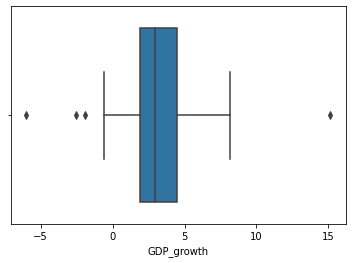

In [41]:
sns.boxplot(x=covid_data['GDP_growth'])

## Removing Outliers

In [42]:
# dealing with outliers

#iqr = np.percentile(covid_data['GDP'],75) - np.percentile(covid_data['GDP'],25)
#upper_limit_gdp = np.percentile(covid_data['GDP'],75) + 1.5*iqr
#lower_limit_gdp = np.percentile(covid_data['GDP'],25) - 1.5*iqr

#removing outliers

#covid_data = covid_data[(covid_data['GDP']>lower_limit_gdp) & (covid_data['GDP']<upper_limit_gdp) & (covid_data['GDP']>lower_limit_gdp)
                       

Outliers have not been removed due to the small size of the sample. Removing outliers led to poorer model performance

## Checking Correlation - Pearson

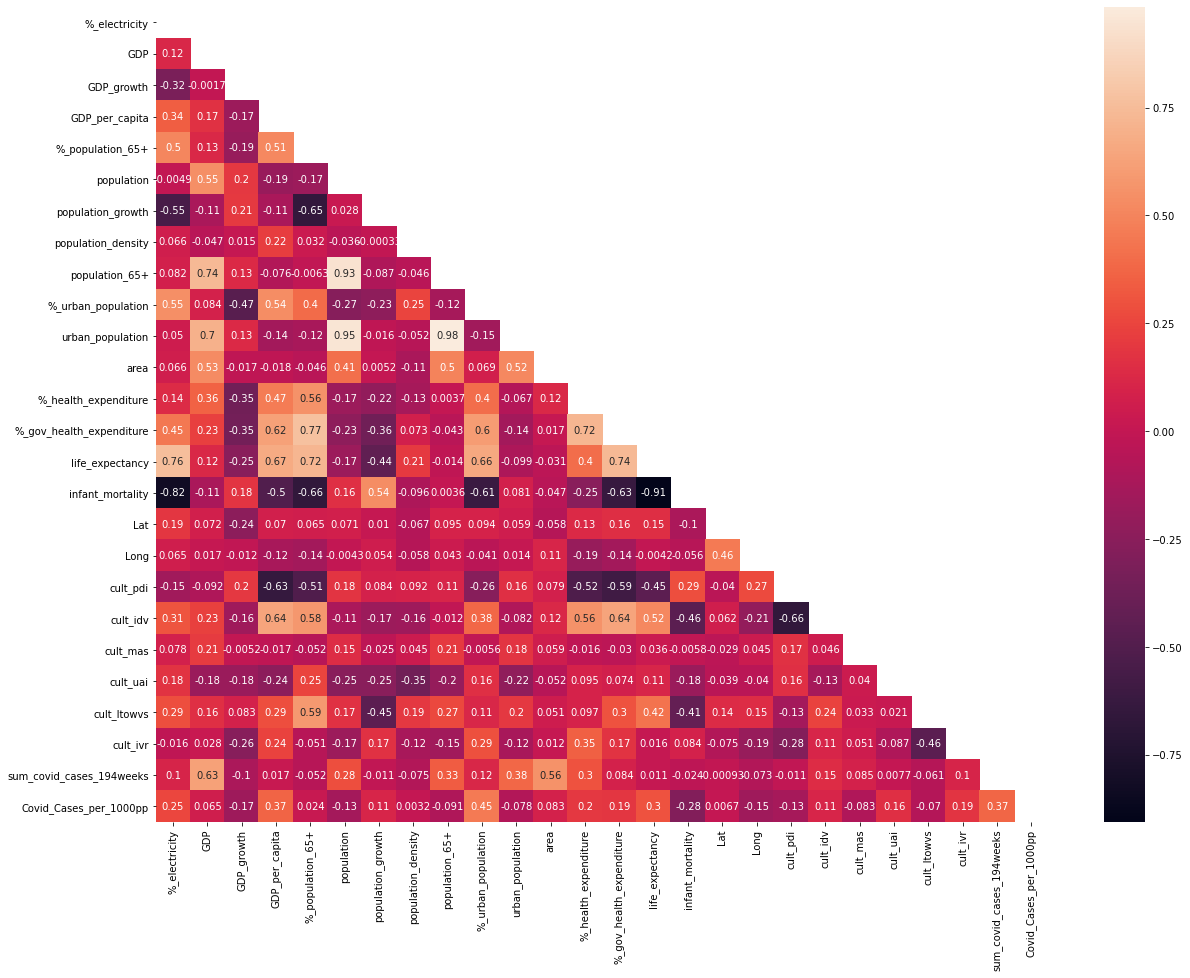

In [43]:
# Checking Correlation 

corr_matrix=covid_data.corr(method='pearson')  # default

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
#plt.show()

In [81]:
# Feature Elimination Using p-values
import statsmodels.api as sm 

x = covid_data.drop(['country', 'sum_covid_cases_194weeks'], axis=1)

x = x[x.columns[x.columns != 'Covid_Cases_per_1000pp']]
y = covid_data.Covid_Cases_per_1000pp
# Statsmodels.OLS requires us to add a constant.
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit() 
print(results.summary())


                              OLS Regression Results                              
Dep. Variable:     Covid_Cases_per_1000pp   R-squared:                       0.500
Model:                                OLS   Adj. R-squared:                  0.259
Method:                     Least Squares   F-statistic:                     2.080
Date:                    Thu, 11 Mar 2021   Prob (F-statistic):             0.0146
Time:                            18:41:49   Log-Likelihood:                -523.88
No. Observations:                      75   AIC:                             1098.
Df Residuals:                          50   BIC:                             1156.
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Features have been removed based on their p-value, one by one, at the end these values were left:
(cult_uai and population_density were kept as they had a positive impact on the model, though their p-value is >0,05)

In [646]:
x = covid_data.drop(['country','Covid_Cases_per_1000pp','sum_covid_cases_194weeks','GDP_growth','population_65+','cult_pdi', 'cult_mas', 'cult_uai', 'cult_ltowvs','Lat','life_expectancy','area','population','GDP', 'urban_population', '%_electricity','%_population_65+','cult_ivr','%_health_expenditure','%_gov_health_expenditure', 'infant_mortality','population_growth','population_density'],axis=1)
y = covid_data.Covid_Cases_per_1000pp
# Statsmodels.OLS requires us to add a constant.
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit() 
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     Covid_Cases_per_1000pp   R-squared:                       0.284
Model:                                OLS   Adj. R-squared:                  0.243
Method:                     Least Squares   F-statistic:                     6.941
Date:                    Thu, 11 Mar 2021   Prob (F-statistic):           9.15e-05
Time:                            19:07:34   Log-Likelihood:                -537.32
No. Observations:                      75   AIC:                             1085.
Df Residuals:                          70   BIC:                             1096.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

R-squared and adjusted R have both decreased in itself but also decreased the difference among themselves.

The Adjusted R-squared value is similar to the Multiple R-squared value, but takes the number of  into account. Hence R-squared will always increase when a new variable is added to the prediction model, but if the variable is non-significant the Adjusted R-squared value will decrease.

The lower difference between R2 and adjusted R after feature removal speaks for less non-significant variables within the model.

## Train Test Split and X Feature Selection

In [694]:
from sklearn.model_selection import train_test_split

y = covid_data['Covid_Cases_per_1000pp']
               
X = covid_data.drop(['country','Covid_Cases_per_1000pp','sum_covid_cases_194weeks','GDP_growth','population_65+','cult_pdi', 'cult_mas', 'cult_uai', 'cult_ltowvs','Lat','area','population','GDP', 'urban_population', '%_electricity','%_population_65+','cult_ivr','%_health_expenditure','%_gov_health_expenditure', 'infant_mortality','population_growth','%_urban_population','life_expectancy','Long','population_density'],axis=1)

In [695]:
display(X.head())


,GDP_per_capita,cult_idv
0,11633.498009,46
1,57354.964046,90
2,51478.285262,55
3,1698.350394,20
4,47583.074941,75


In [717]:
#X has been selected on Pearson, P Value and - due to strong overfit of the training data - the RMSE vs. Mean of the train and test data. 

In [718]:
X.shape

(75, 2)

## Feature Engineering

In [719]:
def distribution_plot(data,column):
    data_log = data[column].apply(lambda x: np.log(x) if(x>0) else x)  ## Fix this function to not get infs 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4))
    sns.distplot(data[column], ax=ax1)
    ax1.set_title('Actual Distribution')
    sns.distplot(data_log, ax=ax2)
    ax2.set_title('Log Transformation')
    plt.show()


#for val in X.columns:
 #    distribution_plot(X,val)

In [720]:
#applying log trans
#X['GDP'] = X['GDP'].apply(lambda x: np.log(x) if(x>0) else x)
X['GDP_per_capita'] = X['GDP_per_capita'].apply(lambda x: np.log(x) if(x>0) else x)
#X['population'] = X['population'].apply(lambda x: np.log(x) if(x>0) else x)
#X['population_density'] = X['population_density'].apply(lambda x: np.log(x) if(x>0) else x)
#X['population_growth'] = X['population_growth'].apply(lambda x: np.log(x) if(x>0) else x)
#['%_urban_population'] = X['%_urban_population'].apply(lambda x: np.log(x) if(x>0) else x)
#X['%_gov_health_expenditure'] = X['%_gov_health_expenditure'].apply(lambda x: np.log(x) if(x>0) else x)
X['cult_idv'] = X['cult_idv'].apply(lambda x: np.log(x) if(x>0) else x)
#X['cult_uai'] = X['cult_uai'].apply(lambda x: np.log(x) if(x>0) else x)

#X['Long'] = X['Long'].apply(lambda x: np.log(x) if(x>0) else x)

#X['%_population_65+'] = X['%_population_65+'].apply(lambda x: np.log(x) if(x>0) else x)

#X['life_expectancy'] = X['life_expectancy'].apply(lambda x: np.log(x) if(x>0) else x)

#X['area'] = X['area'].apply(lambda x: np.log(x) if(x>0) else x)
#X['infant_mortality'] = X['infant_mortality'].apply(lambda x: np.log(x) if(x>0) else x)
    #sns.displot(X[val])

In [721]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

standard = StandardScaler()
X_train_scaled = standard.fit_transform(X_train)
X_test_scaled  = standard.transform(X_test)

In [722]:
clf = linear_model.Lasso(alpha=0.1) 
clf.fit(X, y)

Lasso(alpha=0.1)

In [723]:
from sklearn.ensemble import ExtraTreesRegressor
svr_lin = svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
ridge = Ridge(alpha=0.1)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

In [724]:
model1 = linear_model.LinearRegression()
model2 = KNeighborsRegressor(7)
model3 = RandomForestRegressor(random_state=0)
model4 = Lasso(alpha=1.0)
model5 = ElasticNet(random_state=0)
#model6 = svr_lin
model7= svr_rbf
model8= ridge    #RidgeRegression
model9 = reg
linear_models = [model1,model2,model3,model4,model5,model7,model8,model9]

In [725]:
def my_scores(lis):
    results = pd.DataFrame(lis,columns = ['R_square','MAE','MSE','RMSE'])
    results.insert(0,'Models',['Linear Regression','KNneighborsRegressor', 'RandomForestRegressor', 'Lasso','ElasticNet','SVR_RBF','RidgeRegression','ExtraTree'])
    results = results.T
    return results


In [726]:
def models_automation(models, X_train, y_train, X_test, y_test):
    lis = []
    lis1 = []
    for i,model in enumerate(models):
        lis.append([])
        lis1.append([])
        model.fit(X_train, y_train)
        print(f"{str(model)}: Test -> {model.score(X_test, y_test)}")
        lis[i].append(model.score(X_test, y_test))
        y_predict = model.predict(X_test)
        plt.scatter(np.arange(0,len(X_test),1), y_test, color = 'black', label = 'actual')
        plt.plot(np.arange(0,len(X_test),1), y_predict, color = 'blue', linewidth = 3, label = 'predicted')
        plt.title(str(model)+' Test set plot')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.legend()
        plt.xticks(())
        plt.yticks(())
        plt.show()
        lis1[i].append(list(y_predict))
        lis[i].append(mean_absolute_error(y_test,y_predict))
        lis[i].append(mean_squared_error(y_test,y_predict))
        lis[i].append(mean_squared_error(y_test, y_predict, squared=False))
    return lis,lis1

LinearRegression(): Test -> 0.2036350907916511


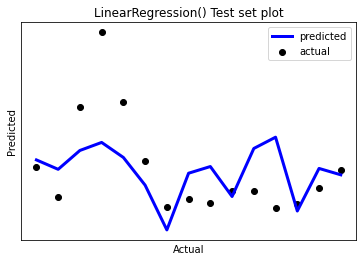

KNeighborsRegressor(n_neighbors=7): Test -> 0.08069162433852861


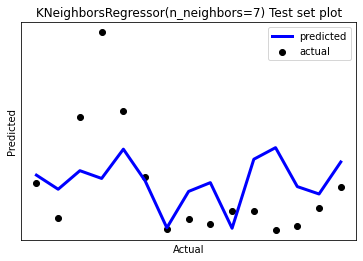

RandomForestRegressor(random_state=0): Test -> 0.2421263437523239


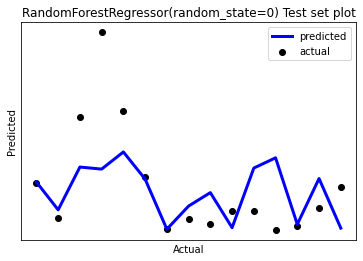

Lasso(): Test -> 0.2150524264433452


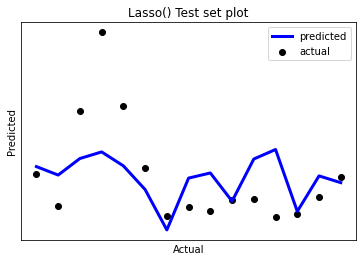

ElasticNet(random_state=0): Test -> 0.003935962850656671


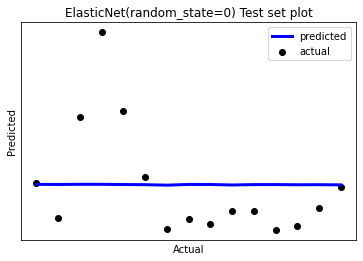

SVR(C=100, gamma=0.1): Test -> -0.06918083665589614


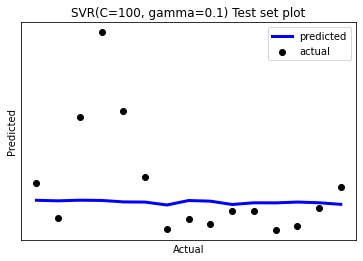

Ridge(alpha=0.1): Test -> 0.19445495624051834


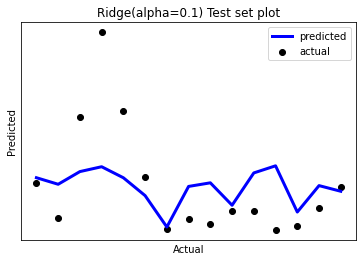

ExtraTreesRegressor(random_state=0): Test -> 0.21790862373420605


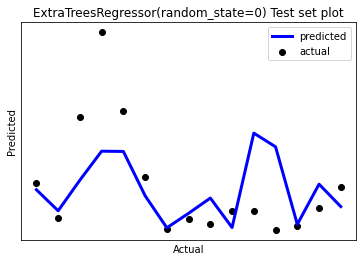

In [727]:
my_list,my_list1 = models_automation(linear_models, X_train, y_train, X_test, y_test)

In [728]:
data1 = my_scores(my_list)
data1.head()

,0,1,2,3,4,5,6,7
Models,Linear Regression,KNneighborsRegressor,RandomForestRegressor,Lasso,ElasticNet,SVR_RBF,RidgeRegression,ExtraTree
R_square,0.203635,0.0806916,0.242126,0.215052,0.00393596,-0.0691808,0.194455,0.217909
MAE,250.324,257.116,216.375,239.882,274.49,246.394,238.936,226.258
MSE,105699,122017,100590,104184,132205,141909,106918,103805
RMSE,325.114,349.309,317.16,322.775,363.599,376.708,326.983,322.187


The Models (Lasso, ElasticNet, SVR_RBF, RidgeRegression and EstraTree) have been selected due to their good fit for small sample sizes.
Lineat Regression, KNeighbors and RandomForest have been added for comparison

## Checking if the Model is overfit 
by comparing the y_test Mean to the y_test + Y-modelN RMSE

In [729]:
list(model1.predict(X_test)[0:5])


[383.7229497650974,
 313.16069877743894,
 454.5416212986004,
 514.8034602447287,
 402.052000605858]

In [730]:
# comparing the test data with RMSE

import math
y_pred_RandomForest = model3.predict(X_test) 
MSE = np.square(np.subtract(y_test,y_pred_RandomForest)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n Random_Forest vs Actual")
print(RMSE)

Root Mean Square Error:
 Random_Forest vs Actual
317.15970507521683


In [731]:

y_pred_Lasso = model4.predict(X_test) 
MSE = np.square(np.subtract(y_test,y_pred_Lasso)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n Lasso vs Actual")
print(RMSE)

Root Mean Square Error:
 Lasso vs Actual
322.7750264412272


In [732]:


y_pred_ExtraTree = model9.predict(X_test) 
MSE = mean_squared_error(y_test,y_pred_ExtraTree)

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n ExtraTree vs Actual")
print(RMSE)


Root Mean Square Error:
 ExtraTree vs Actual
322.1872487624042


In [733]:
y_pred_ExtraTree = model9.predict(X_train) 
MSE = mean_squared_error(y_train,y_pred_ExtraTree)

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n ExtraTree vs Actual")
print(RMSE)


Root Mean Square Error:
 ExtraTree vs Actual
5.898821142284783e-13


In [734]:
# Comparing the RMSE of yTest and YPredicted (per model) with the YTest Mean to see how well the model performs. If e.g. the RMSE is 10% above or below the mean, we have a good fit!

In [735]:
np.mean(y_test)

319.2698047260904

In [736]:
np.mean(y_train)

325.3405861056779

Though it was possible to detect features that show a significant impact on the No. of covid cases per 1000k inhabitants, the modes show a very low RSquare value. Therefore additional Features need to be added to create a model. Additionally, the model is strongly overfit due to the small sample size. 


As a next step, additional features (e.g. wind, temperature, nutrition, sports events) need to be evaluated for their fit for the model
Furthermore, the data set needs to be enlarged - e.g. by going from country to regional data. 